##**Install Required Libraries**

In [ ]:
!pip install scikit-learn matplotlib numpy

##**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt


##**Load and Preprocess the Dataset**

In [ ]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset
print("Loading dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize pixel values to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Loading dataset...
Training data shape: (56000, 784)
Testing data shape: (14000, 784)


Use a dataset like MNIST or any other classification dataset. Normalize pixel values between 0 and 1, and split the data.

##**Define and Train the RBM**

In [ ]:
# Define RBM
n_hidden_units = 128  # Number of hidden units
rbm = BernoulliRBM(n_components=n_hidden_units, learning_rate=0.01, n_iter=10, random_state=42)

# Train RBM
print("Training RBM...")
rbm.fit(X_train)

print("RBM training completed.")


Training RBM...
RBM training completed.


Set the number of visible and hidden units. Train the RBM on the training data.


##**Transform Data Using RBM**

In [ ]:
# Transform the training and testing data using the RBM
print("Transforming data using RBM...")
X_train_rbm = rbm.transform(X_train)
X_test_rbm = rbm.transform(X_test)

print(f"RBM-transformed training data shape: {X_train_rbm.shape}")
print(f"RBM-transformed testing data shape: {X_test_rbm.shape}")


Transforming data using RBM...
RBM-transformed training data shape: (56000, 128)
RBM-transformed testing data shape: (14000, 128)


##**Visualize Learned Weights**

Visualizing RBM weights...


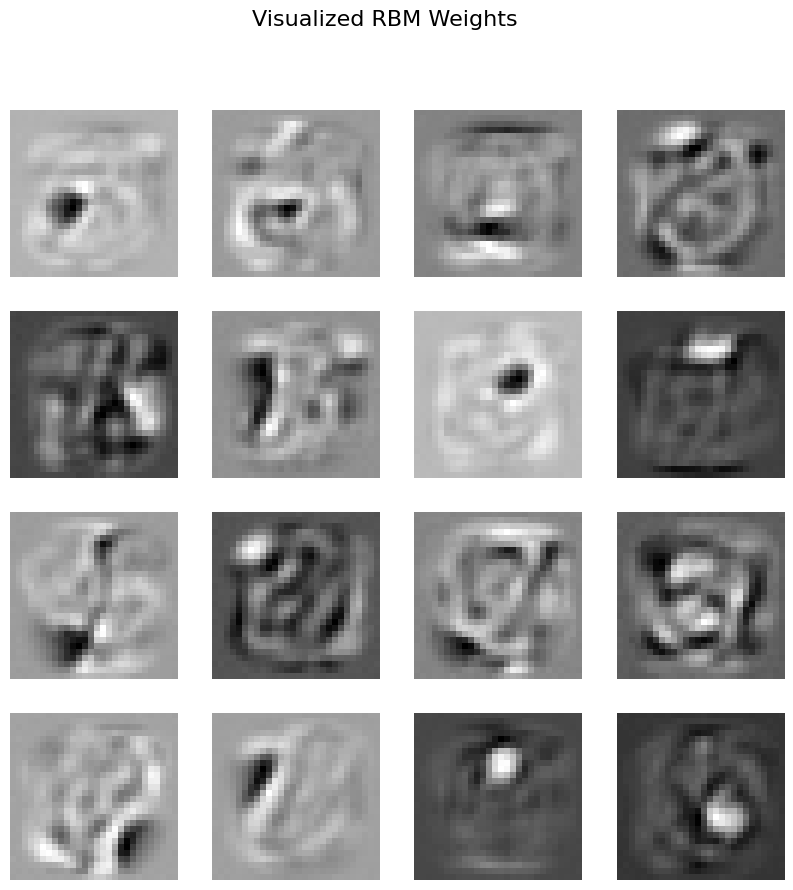

In [ ]:
# Visualize the weights
print("Visualizing RBM weights...")
weights = rbm.components_

plt.figure(figsize=(10, 10))
for i in range(16):  # Display 16 hidden unit weights as images
    plt.subplot(4, 4, i + 1)
    plt.imshow(weights[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Visualized RBM Weights", fontsize=16)
plt.show()


##**Train a Classifier Using RBM-Extracted Features**

In [ ]:
# Train logistic regression on RBM-extracted features
print("Training classifier on RBM-extracted features...")
classifier = LogisticRegression(max_iter=500, random_state=42)
classifier.fit(X_train_rbm, y_train)

# Test the classifier
y_pred = classifier.predict(X_test_rbm)

# Compute accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy (RBM features): {accuracy:.4f}")
print(f"F1-Score (RBM features): {f1:.4f}")


Training classifier on RBM-extracted features...
Accuracy (RBM features): 0.9433
F1-Score (RBM features): 0.9432


##**Train Classifier on Raw Pixel Data**

In [ ]:
# Train classifier on raw pixel data
print("Training classifier on raw pixel data...")
classifier_raw = LogisticRegression(max_iter=500, random_state=42)
classifier_raw.fit(X_train, y_train)

# Test the classifier
y_pred_raw = classifier_raw.predict(X_test)

# Compute accuracy and F1-score
accuracy_raw = accuracy_score(y_test, y_pred_raw)
f1_raw = f1_score(y_test, y_pred_raw, average='weighted')

print(f"Accuracy (Raw pixels): {accuracy_raw:.4f}")
print(f"F1-Score (Raw pixels): {f1_raw:.4f}")


Training classifier on raw pixel data...
Accuracy (Raw pixels): 0.9203
F1-Score (Raw pixels): 0.9201


##**Analysis and Comparison**

In [ ]:
print("\nPerformance Comparison:")
print(f"Classifier on Raw Pixels -> Accuracy: {accuracy_raw:.4f}, F1-Score: {f1_raw:.4f}")
print(f"Classifier on RBM Features -> Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

# Display classification report for RBM features
print("\nClassification Report (RBM Features):")
print(classification_report(y_test, y_pred))



Performance Comparison:
Classifier on Raw Pixels -> Accuracy: 0.9203, F1-Score: 0.9201
Classifier on RBM Features -> Accuracy: 0.9433, F1-Score: 0.9432

Classification Report (RBM Features):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.97      0.98      0.98      1600
           2       0.93      0.93      0.93      1380
           3       0.93      0.92      0.93      1433
           4       0.94      0.94      0.94      1295
           5       0.93      0.92      0.93      1273
           6       0.96      0.97      0.97      1396
           7       0.96      0.94      0.95      1503
           8       0.93      0.92      0.92      1357
           9       0.91      0.92      0.91      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



The **RBM features** significantly improve performance, achieving **94.33% accuracy** compared to **92.03% with raw pixels**, showing RBM effectively extracts meaningful patterns. The high precision, recall, and F1-scores across all classes confirm balanced and improved classification. This demonstrates the power of RBM in reducing noise and enhancing feature quality for better model accuracy.